<a href="https://colab.research.google.com/github/dishadtu/working_custom_data_yolov8/blob/main/working_custom_data_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi 

Fri Jun  2 00:22:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 19.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/datasets/mask_dataset'
!ls '/content/drive/MyDrive/datasets/mask_dataset/train/'

dataset.yaml		  labels.cache	    test   valid
face_mask_detection.yaml  mask_testing.mp4  train
image.cache  images  labels  labels.cache


In [ ]:


# I will write the contents of the cell to a file
%%writefile /content/drive/MyDrive/datasets/mask_dataset/face_mask_detection.yaml 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/datasets/mask_dataset # dataset root dir
train: train/images/ # train images (relative to 'path')
val: valid/images/ # val images (relative to 'path')
test:  # test images (optional)

# number of classes
nc: 3

# class names
#names: ['0', '1', '2']
names: [ 'no_mask', 'mask','improper_mask']  # class names

Overwriting /content/drive/MyDrive/datasets/mask_dataset/face_mask_detection.yaml


In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/datasets/mask_dataset/train/images/5e353e347af50726986e84c0.jpeg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/datasets/mask_dataset/valid/images/maksssksksss254.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))


shape of the training image 667, 1000
shape of the validation image 217, 400


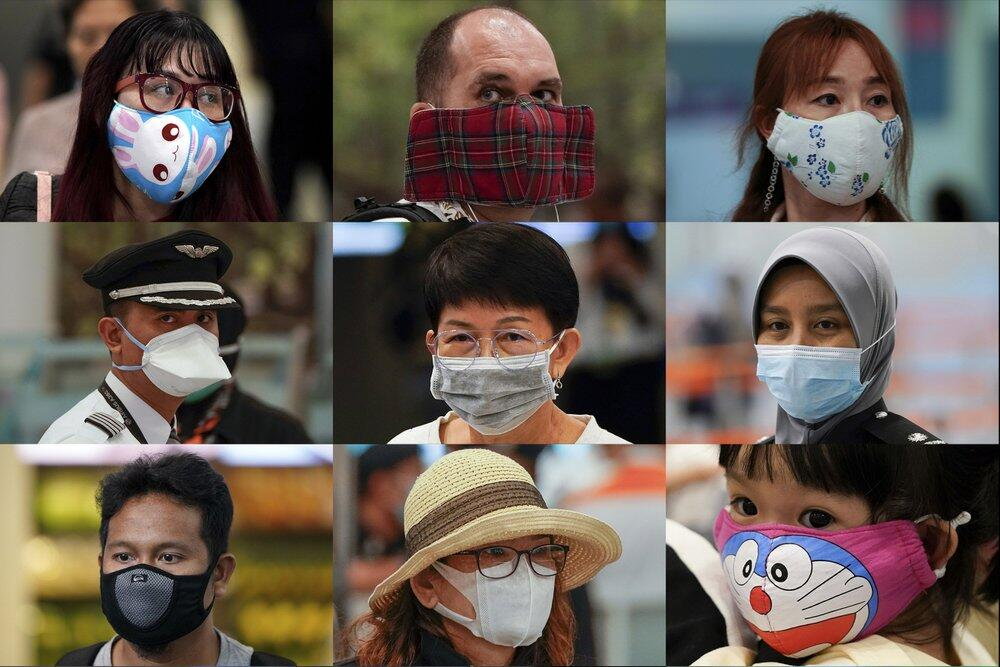

In [ ]:
# dispying with different width
from IPython.display import Image 
Image(filename='/content/drive/MyDrive/datasets/mask_dataset/train/images/5e353e347af50726986e84c0.jpeg', width=300)

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/datasets/mask_dataset/face_mask_detection.yaml", epochs=25, imgsz=640)  # train the model
     


100%|██████████| 49.7M/49.7M [00:00<00:00, 66.8MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/datasets/mask_dataset/face_mask_detection.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

In [ ]:
results = model.val()  # evaluate model performance on the validation set


Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/datasets/mask_dataset/valid/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:15<00:00,  1.21it/s]
                   all        294       1473      0.623       0.64      0.606      0.383
               no_mask        294        225      0.763      0.716      0.711      0.419
                  mask        294       1235      0.821      0.819      0.824      0.518
         improper_mask        294         13      0.286      0.385      0.283      0.212
Speed: 3.3ms preprocess, 18.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val


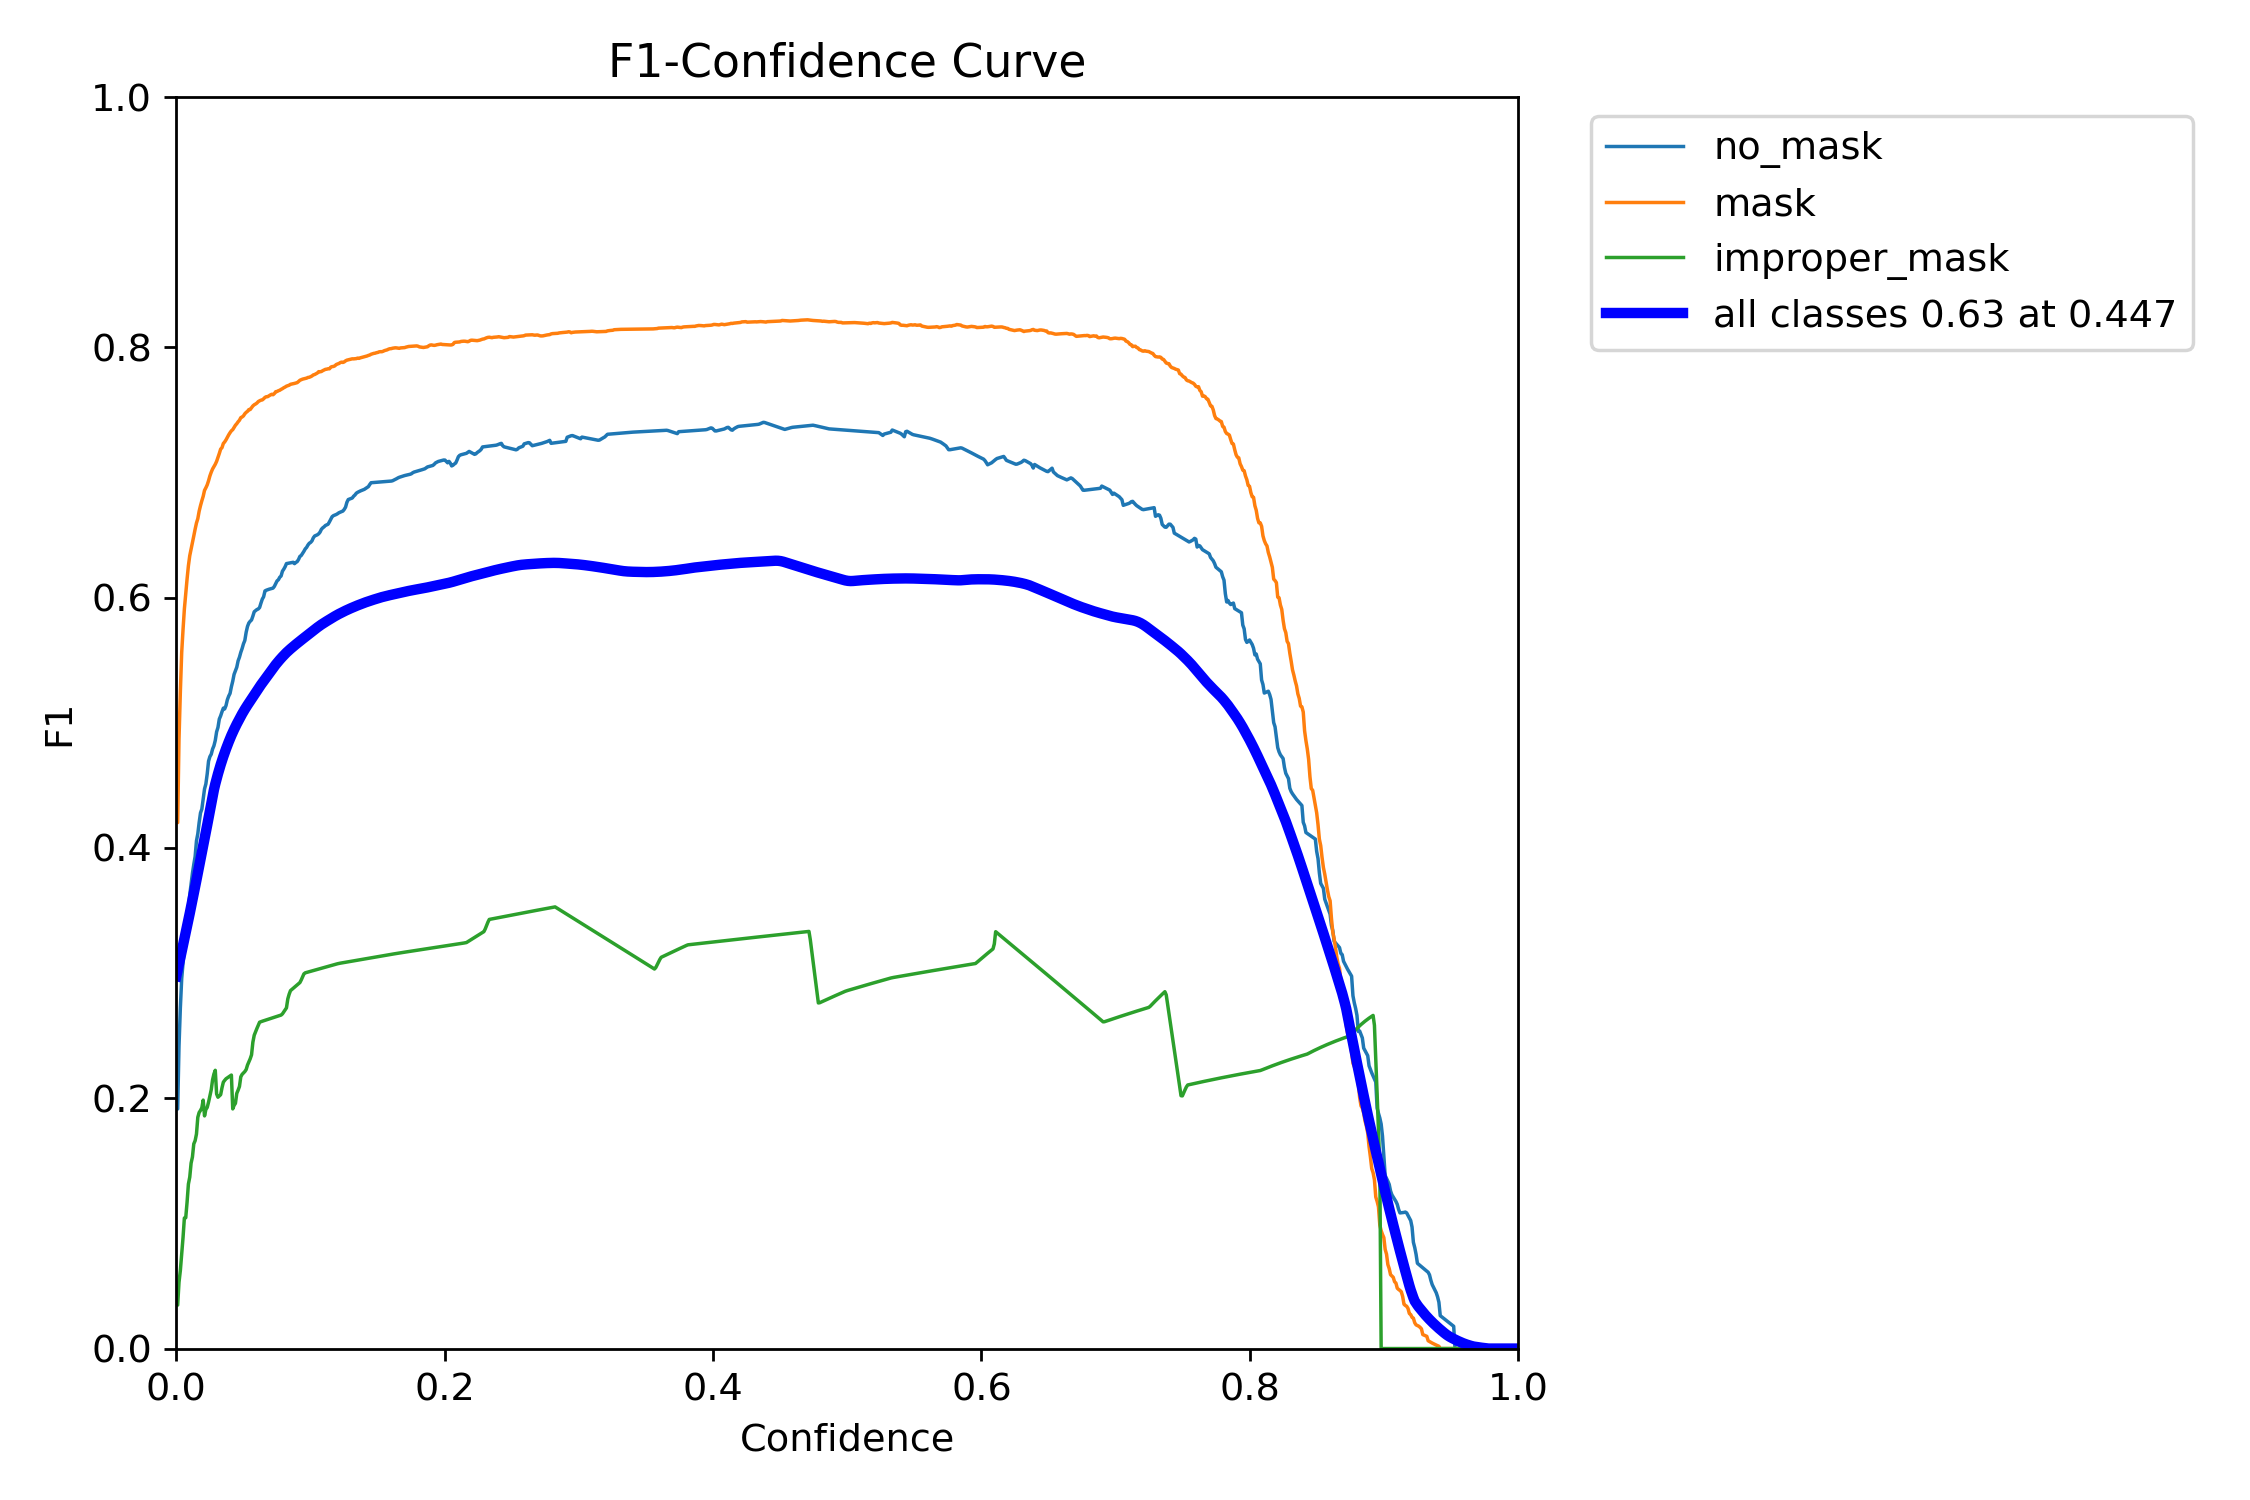

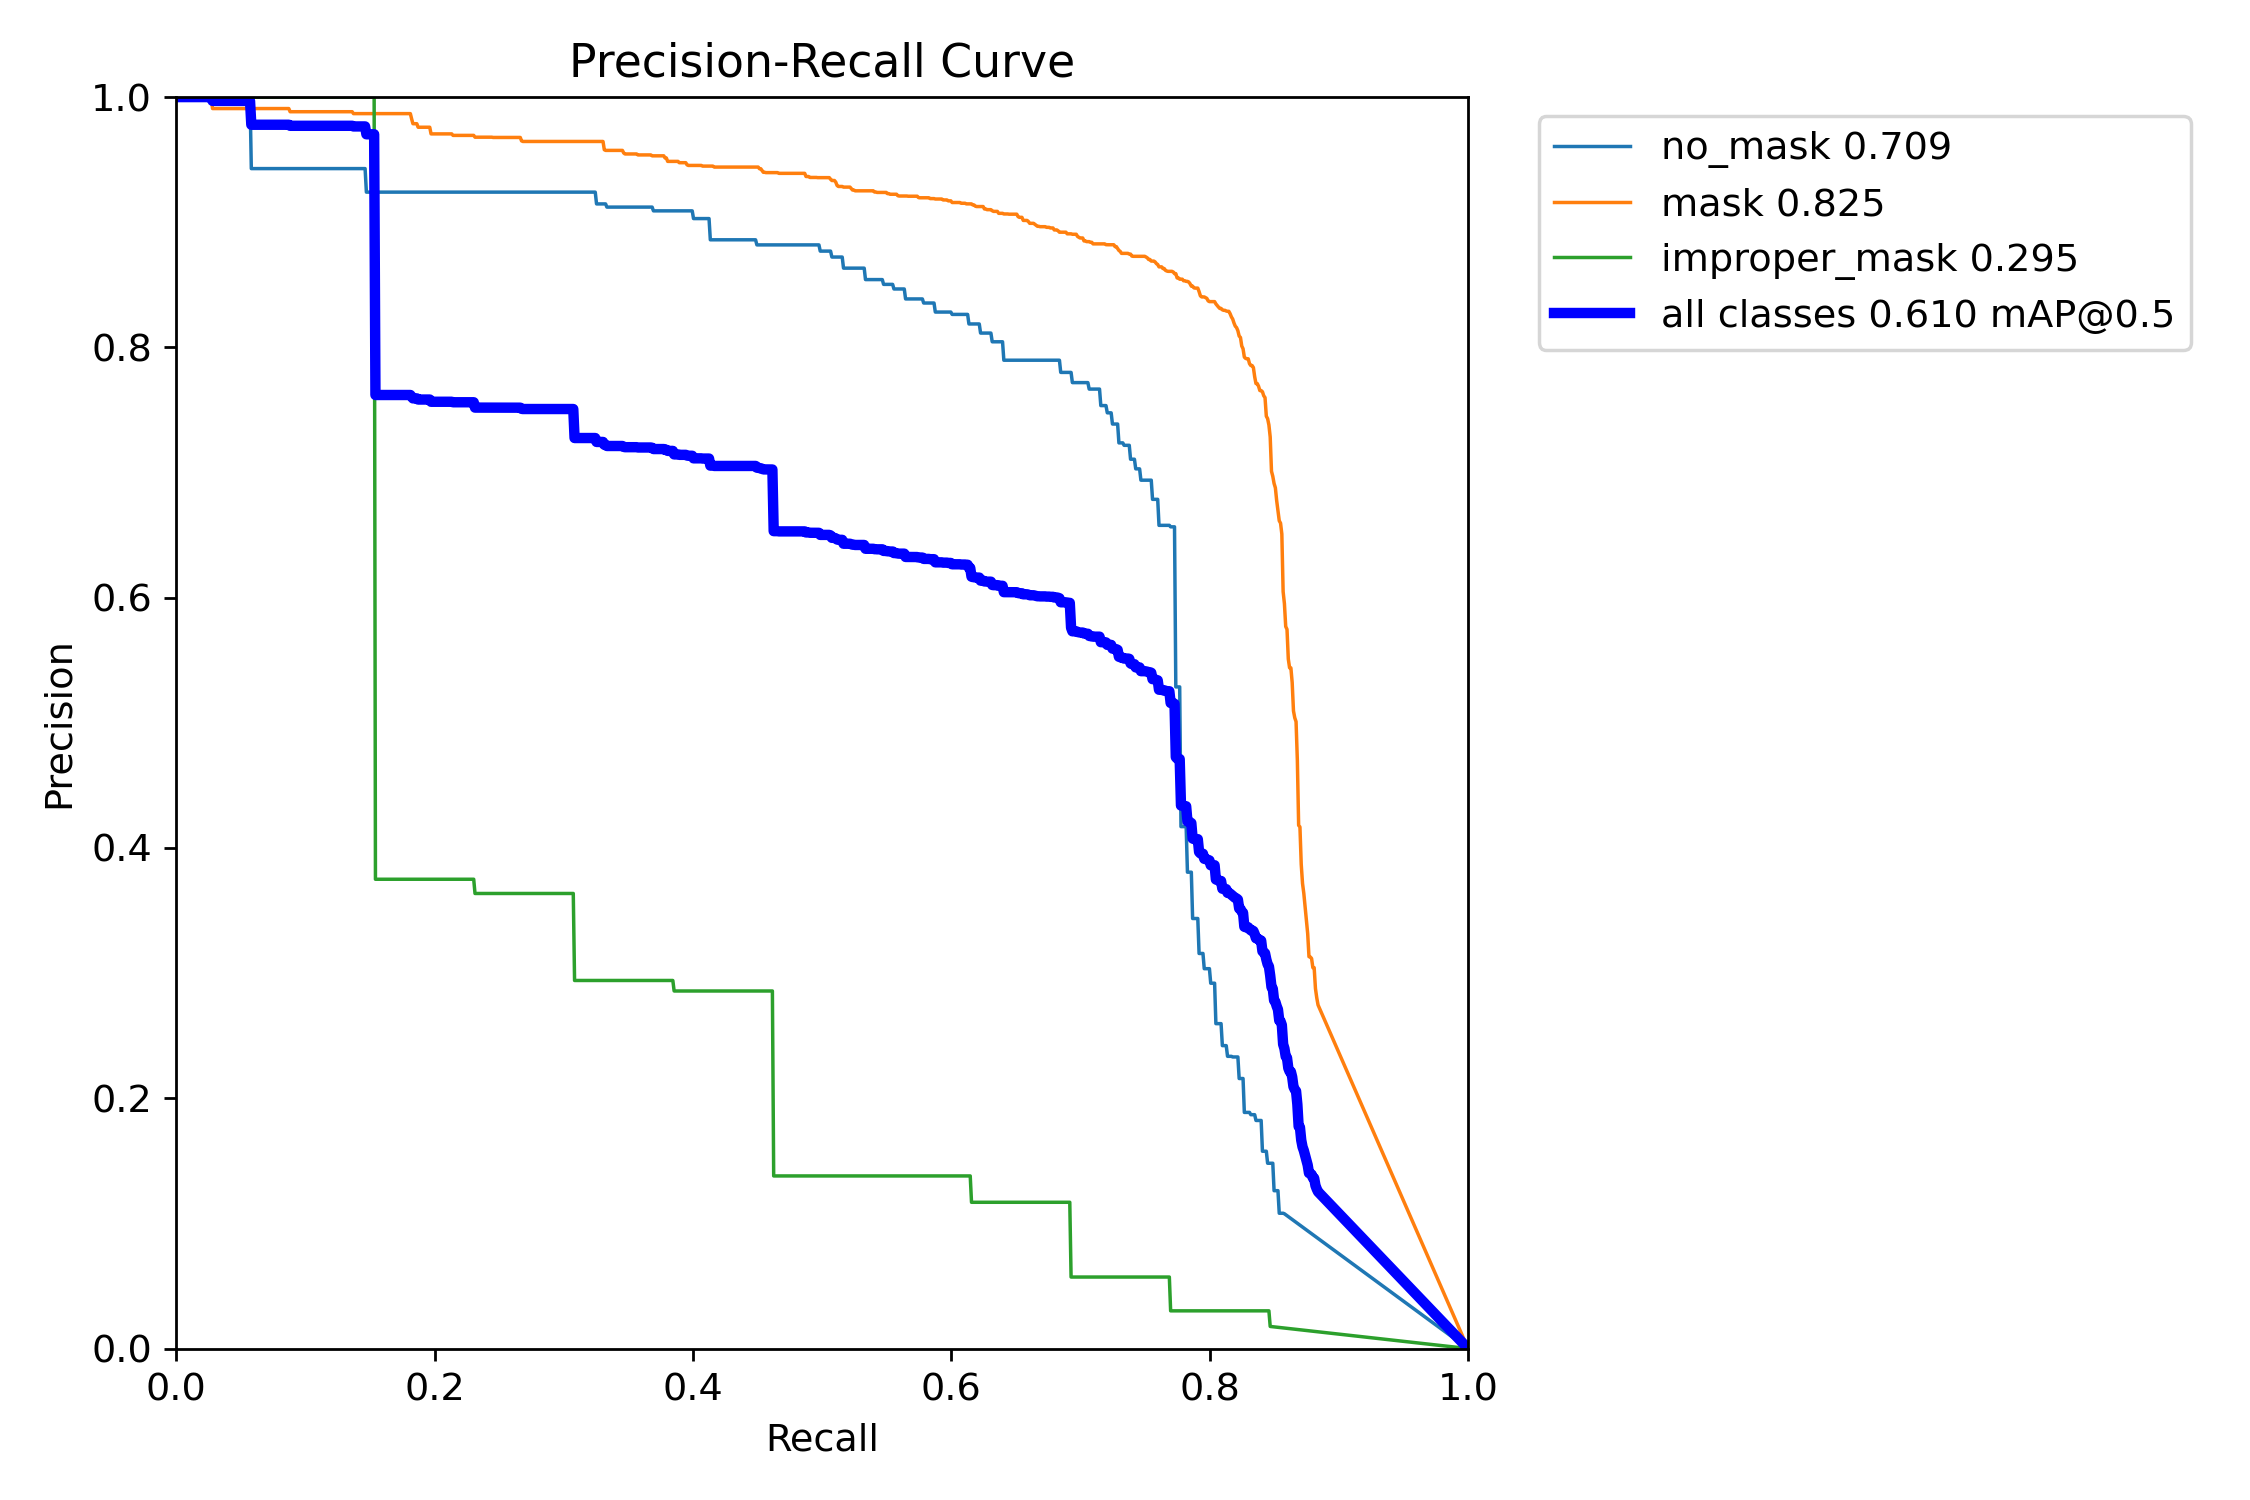

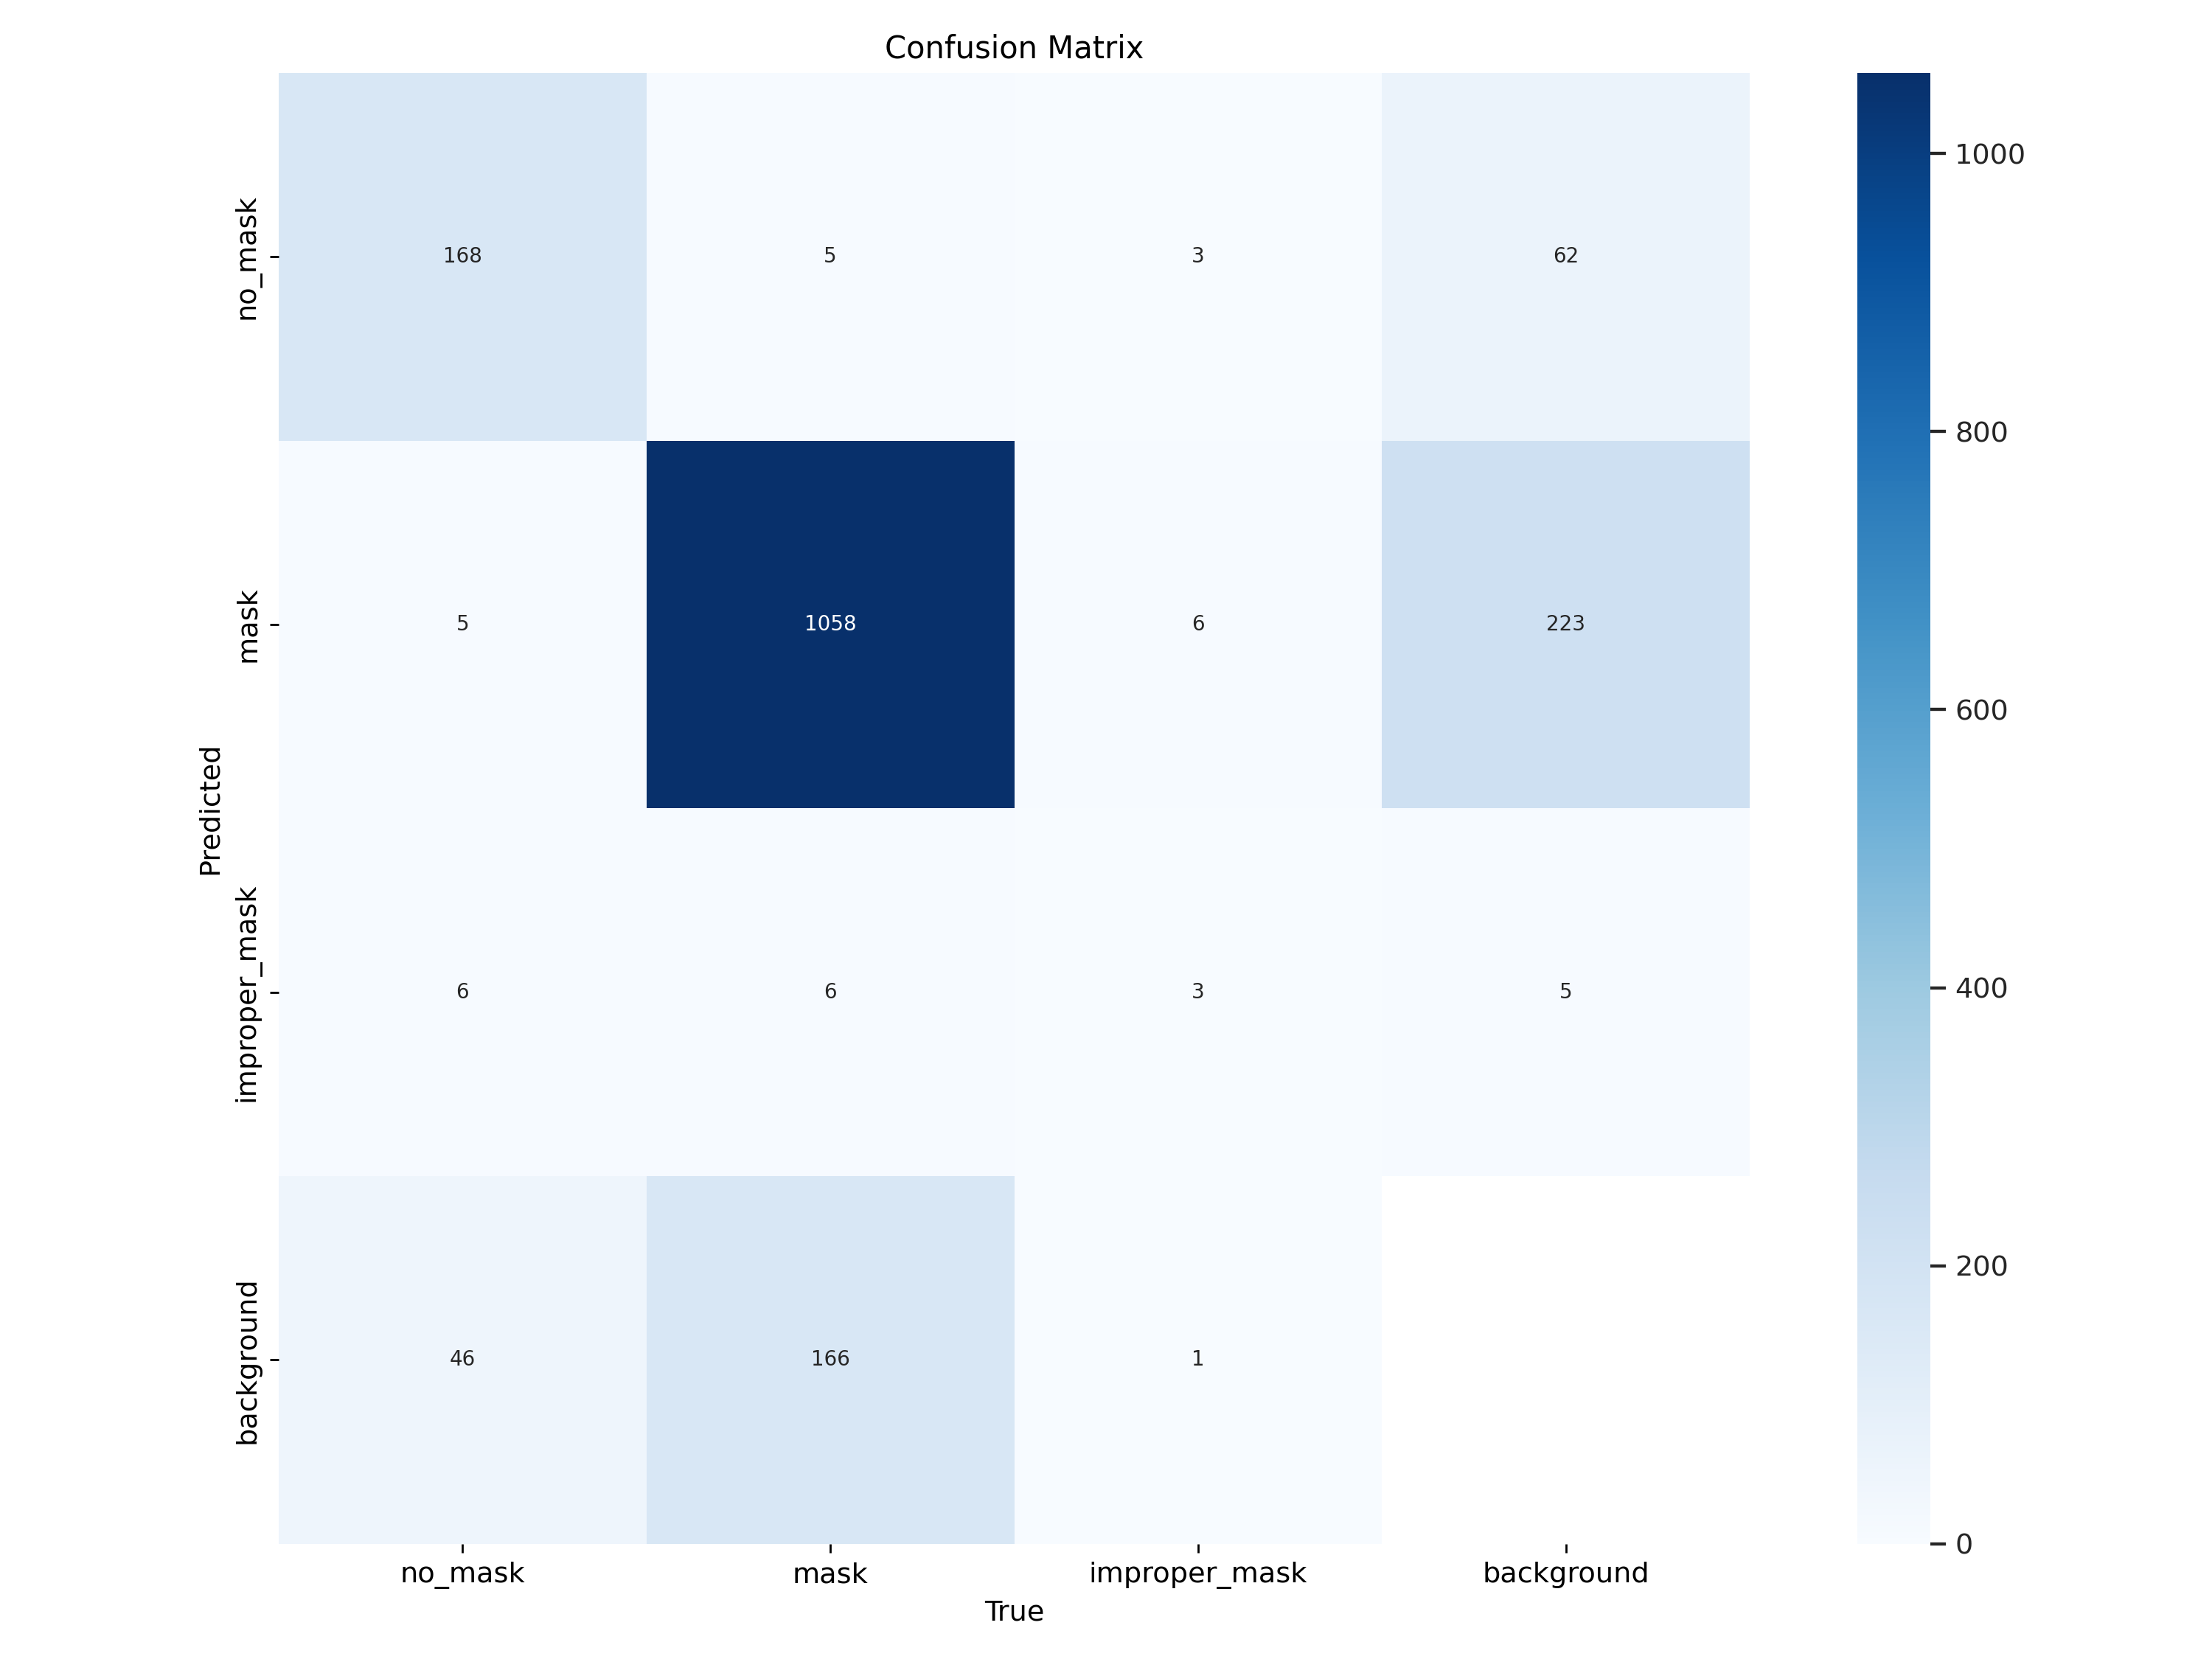

In [ ]:

# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)

In [ ]:
# checking the latest trained files
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ls 'runs/detect/train/weights'

best.pt  last.pt


In [ ]:
# loading the trianed model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

In [ ]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4"
     

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

video 1/1 (1/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 97.7ms
video 1/1 (2/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 25.9ms
video 1/1 (3/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 26.7ms
video 1/1 (4/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 25.8ms
video 1/1 (5/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 25.7ms
video 1/1 (6/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 25.8ms
video 1/1 (7/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 masks, 25.8ms
video 1/1 (8/346) /content/drive/MyDrive/datasets/mask_dataset/test-for-masks.mp4: 384x640 2 m